# Project 2: Ames Housing Linear Regression

## Problem Statement

We are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.



## Executive Summary


### Contents:
- [Data Cleaning](#data_cleaning)
- [Getting dummies](#get_dummies)
- [Add new variables](#new_variables)
- [Removing outliers and selecting features](#remove_outliers)
- [Preprocessing](#preprocessing)
- [Train-test-split and Scoring](#train_test_split)
- [Scoring with holdout set](#scoring_holdout)
- [Inferential Visualization](#visual_inference)
- [Business Recommendations](#business_recommendations)
- [Clean test and predict values](#clean_test_predict)

## Data Dictionary

Link to [Data Dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv') #<---- ONLY USE THIS FOR KAGGLE SUBMISSION. 
# to predict 'SALE PRICE' with the final refined model on df_test

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## <a name="data_cleaning"></a>Data Cleaning

In [4]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
# I will be dropping columns that have less than 500 non-null values which is less than 25% with data (500/2051) 
# they are 'Alley', 'Pool QC', 'Fence', 'Misc Feature'.
df.drop(columns = ['Alley', 'Pool QC', 'Fence', 'Misc Feature'], inplace=True)

In [7]:
df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 77, dtype: int64

In [8]:
# I will also be dropping 'Fireplace Qu' as there are 1000 Nan values
df.drop(columns = 'Fireplace Qu', inplace=True)

In [9]:
#Lot Frontage has 330 NaN values. to replace NaN value with 0.
df['Lot Frontage'].fillna(0, inplace=True)

In [10]:
# to replace NaN value in garage area to 0.
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Area'].fillna(0, inplace=True)

In [11]:
# to replace NaN value in unfinished and total basement area to 0.
df['Bsmt Unf SF'].fillna(0, inplace=True)
df['Total Bsmt SF'].fillna(0, inplace=True)

In [12]:
# to replace NaN values with 0
df['Mas Vnr Area'].fillna(0, inplace=True)

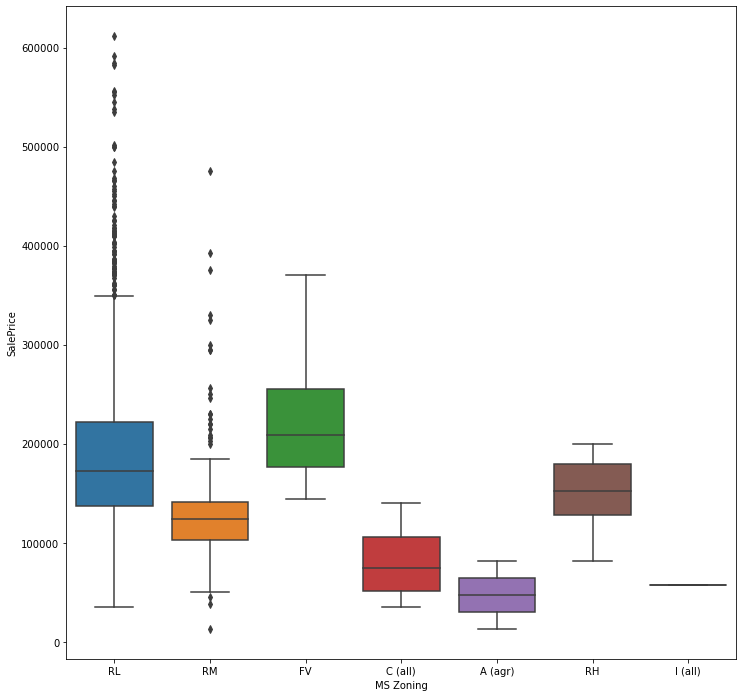

In [13]:
plt.figure(figsize=(12,12))
sns.boxplot(x='MS Zoning', y='SalePrice', data = df);

The classification of properties for Commericial, Agriculture and Industrial are much cheaper than Residential houses. With median prices below 100k. I will be removing them as our model is looking to predict **Housing** sale prices. 

In [14]:
df['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [15]:
# to remove rows from 'MS Zoning' that contains Commercial, Agriculture and Industrial sales as our model is looking to predict HOUSE sale price
df = df.loc[~((df['MS Zoning'] == 'C (all)') | (df['MS Zoning'] == 'A (agr)') | (df['MS Zoning'] == 'I (all)'))]

## <a name="get_dummies"></a>Getting dummies

In [16]:
# mean sale price of Pave is higher than Grvl 
df.groupby(by = 'Street')[['SalePrice']].mean()

,SalePrice
Street,
Grvl,122184.666667
Pave,182721.308983


In [17]:
# to get dummies for df['Street'] 1 if Pave (where the mean sale price is higher) and 0 if Grvl
df['Street'] = df['Street'].map(lambda x: 1 if x == 'Pave' else 0)

In [18]:
# to get dummies for df['Land Contour'] 1 if Lvl (level ground is better than uneven ground) 
# and 0 if anything else
df['Land Contour'] = df['Land Contour'].map(lambda x: 1 if x == 'Lvl' else 0)

In [19]:
# to get dummies for Central Airconditioning. 1 if Yes and 0 if No.
df['Central Air'] = df['Central Air'].map(lambda x: 1 if x == "Y" else 0)

In [20]:
# to get dummies for Paved Drive. 1 if Paved and 0 if Not Paved.
df['Paved Drive'] = df['Paved Drive'].map(lambda x: 1 if x == "Y" else 0)

In [21]:
# to get dummies for Land Slope. 1 if Gentle and 0 if Not Gentle.
df['Land Slope'] = df['Land Slope'].map(lambda x: 1 if x == "Gtl" else 0)

In [22]:
# to get dummies for Exter Qual. 1 if Excellent or Good and 0 for everything else.
df['Exter Qual'] = df['Exter Qual'].map(lambda x: 1 if x == "Ex" or x == "Gd" else 0)

In [23]:
# to get dummies for Exter Cond. 1 if Excellent or Good and 0 for everything else.
df['Exter Cond'] = df['Exter Cond'].map(lambda x: 1 if x == "Ex" or x == 'Gd' else 0)

In [24]:
# to get dummies for Kitchen Qual. 1 if Excellent or Good and 0 for everything else.
df['Kitchen Qual'] = df['Kitchen Qual'].map(lambda x: 1 if x == "Ex" or x == 'Gd' else 0)

## <a name="new_variables"></a>To add new variables

In [25]:
# A new variable, the age of the house during the sale
df['Age'] = df['Yr Sold'] - df['Year Remod/Add']

In [26]:
# A new variable, the total finished basement Sqft 
df['total_fin_bsmt_SF'] = df['Total Bsmt SF'] - df['Bsmt Unf SF']

In [27]:
# A new variable, the total full bathrooms
df['total_full_bath'] = df['Full Bath'] + (df['Half Bath'] * 0.5)

In [28]:
# A new variable, the total porch area 
df['total_porch_area'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']

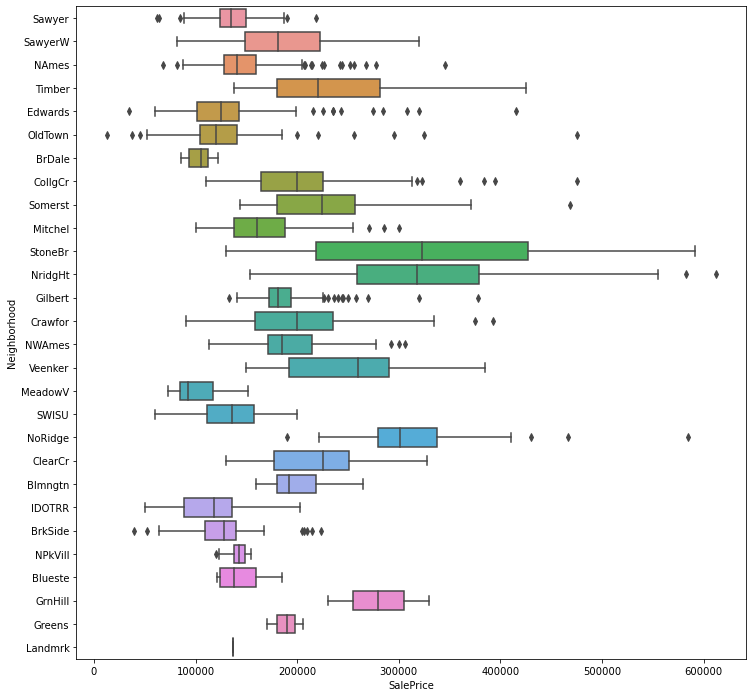

In [29]:
# boxplot of Neighborhood and SalePrice
plt.figure(figsize=(12,12))
sns.boxplot(y= df['Neighborhood'], x= df['SalePrice']);

From the boxplot it can be seen that there are certain Neighborhoods that have a higher SalePrice (300k - 400k) namely 'StoneBr' and 'NridgHt'. There are also Neighborhoods with low SalePrice (80k - 120k) such as 'BrDale', 'MeadowV' and 'IDOTRR'. 
While the rest of the Neighborhoods lie mostly around 200k.

In [30]:
# A new variable, get dummies for Neighborhood
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

Neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Blmngtn    200417.681818
NWAmes     194619.022989
Gilbert    189228.387931
Greens     188666.666667
SawyerW    187760.160920
Mitchel    168720.370370
NAmes      145905.816129
Blueste    144566.666667
NPkVill    140476.470588
Sawyer     137181.909910
Landmrk    137000.000000
SWISU      134758.875000
Edwards    130493.468531
BrkSide    127022.697368
OldTown    125276.300613
IDOTRR     112983.083333
BrDale     103371.052632
MeadowV    100231.250000
Name: SalePrice, dtype: float64

I seperated the Neighborhood by mean sale price in the respective area. Then i gave them an ordinial value of 1 to 3 where 3 is for the top 9 area, 2 for the middle 9 and 1 for the rest.

In [31]:
def dum_neigh(x):
    """To give column Neighborhood an Ordinal value of 1-3 with 3 being more expensive and 1 the least."""
    if 'StoneBr' in x or 'NridgHt' in x or 'NoRidge' in x or 'GrnHill' in x or 'Veenker' in x or 'Timber' in x or 'Somerst' in x or 'ClearCr' in x or 'Crawfor' in x:
        return 3
    elif 'CollgCr' in x or 'Blmngtn' in x or 'NWAmes' in x or 'Gilbert' in x or 'Greens' in x or 'SawyerW' in x or 'Mitchel' in x or 'NAmes' in x or 'Blueste' in x:
        return 2
    else:
        return 1

In [32]:
df['Neighborhood_dum'] = df['Neighborhood'].map(dum_neigh)

## <a name="remove_outliers"></a>To remove outliers and select features

In [33]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Age,total_fin_bsmt_SF,total_full_bath,total_porch_area,Neighborhood_dum
0,109,533352170,60,RL,0.0,13517,1,IR1,1,AllPub,...,0,3,2010,WD,130500,5,533.0,2.5,44,1
1,544,531379050,60,RL,43.0,11492,1,IR1,1,AllPub,...,0,4,2009,WD,220000,12,637.0,2.5,74,2
2,153,535304180,20,RL,68.0,7922,1,Reg,1,AllPub,...,0,1,2010,WD,109000,3,731.0,1.0,52,2
3,318,916386060,60,RL,73.0,9802,1,Reg,1,AllPub,...,0,4,2010,WD,174000,3,0.0,2.5,0,3
4,255,906425045,50,RL,82.0,14235,1,IR1,1,AllPub,...,0,3,2010,WD,138500,17,0.0,2.0,59,2


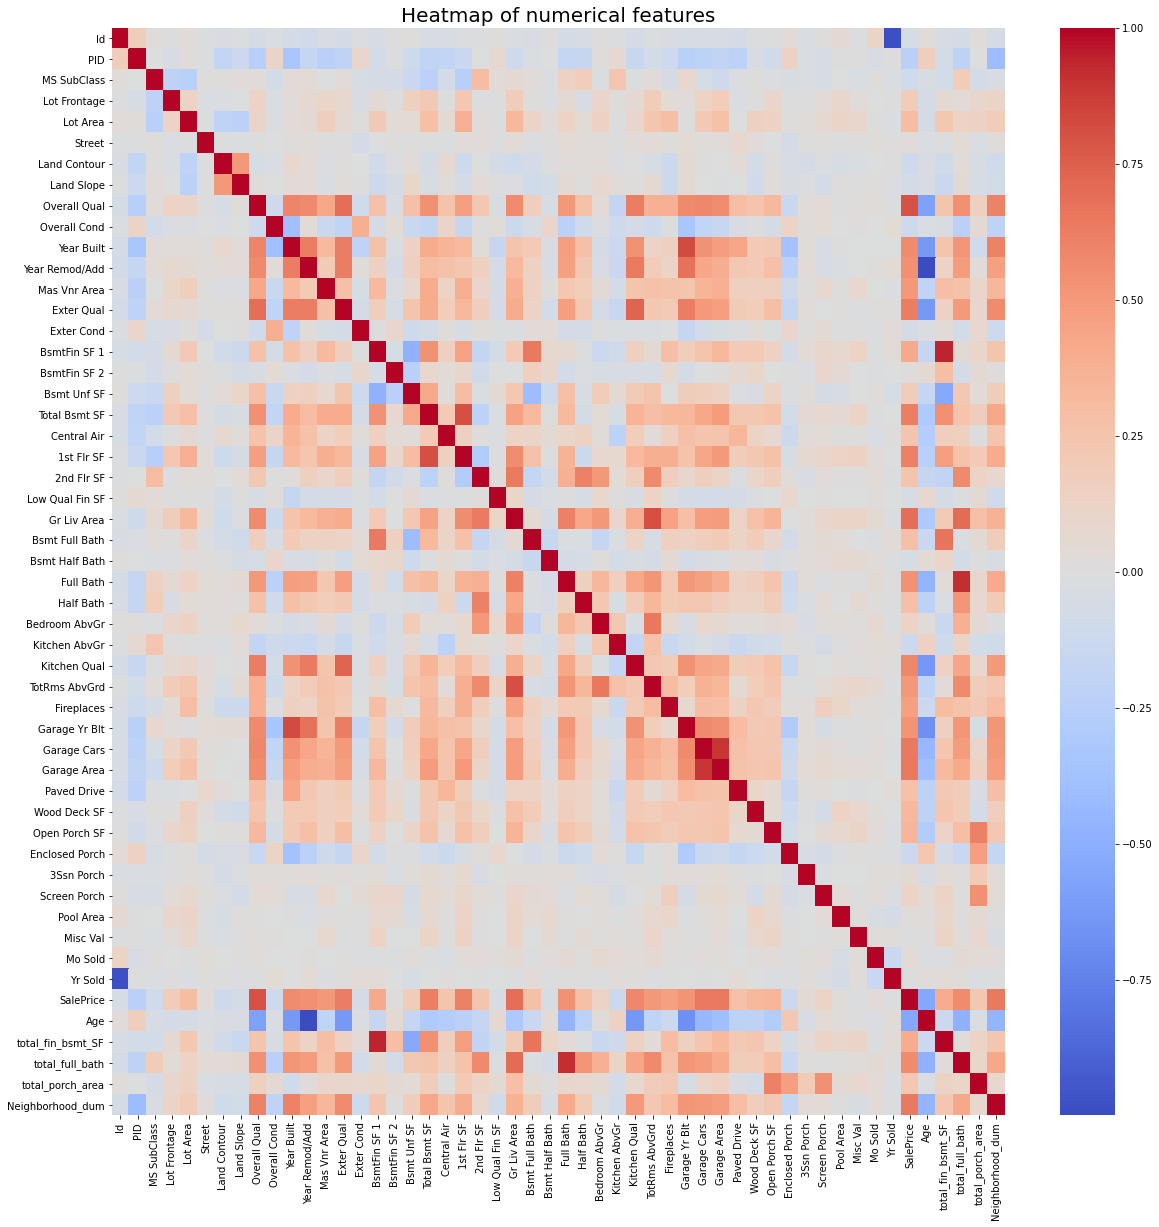

In [34]:
# Heatmap for an overview of the numerical features
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), cmap='coolwarm');
plt.title("Heatmap of numerical features", fontsize =20);

In [35]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.797463
Gr Liv Area          0.694956
Garage Area          0.648170
Garage Cars          0.645071
Neighborhood_dum     0.644869
Exter Qual           0.632660
Total Bsmt SF        0.624187
1st Flr SF           0.616066
Kitchen Qual         0.584551
total_full_bath      0.568343
Year Built           0.564011
Year Remod/Add       0.542437
Full Bath            0.532112
Garage Yr Blt        0.530533
Mas Vnr Area         0.501607
TotRms AbvGrd        0.501333
Fireplaces           0.464721
BsmtFin SF 1         0.418695
total_fin_bsmt_SF    0.405370
Open Porch SF        0.346546
Wood Deck SF         0.321643
Lot Area             0.302164
Half Bath            0.278284
Bsmt Full Bath       0.277989
Paved Drive          0.268148
Central Air          0.253700
2nd Flr SF           0.245870
total_porch_area     0.230514
Lot Frontage         0.189210
Bsmt Unf SF          0.188447
Screen Porch         0.131855
Bedroom AbvGr        0.127942
3Ssn Porch

SalePrice has strong positive correlation with Overall Qual, Gr Liv Area, Garage Cars, Garage Area, Neighborhood_dum, Exter Qual and Total Bsmt SF.
SalePrice has strong negative correlation with Age. We will most likely be including these into the features.

Howeve some points to note:
- I will not be including Garage Yr Blt as it is strongly positively correlated with Year Built which is a part of our new variable 'Age'.

- I will not be including TotRms AbvGrd as it is strongly positively correlated with Gr Liv Area. Also Gr Liv Area has stronger positive correlation with SalePrice.

- I will not be including Garage Cars as it is strongly positively correlated with Garage Area. Also Garage Area is more positively correlated with SalePrice. 

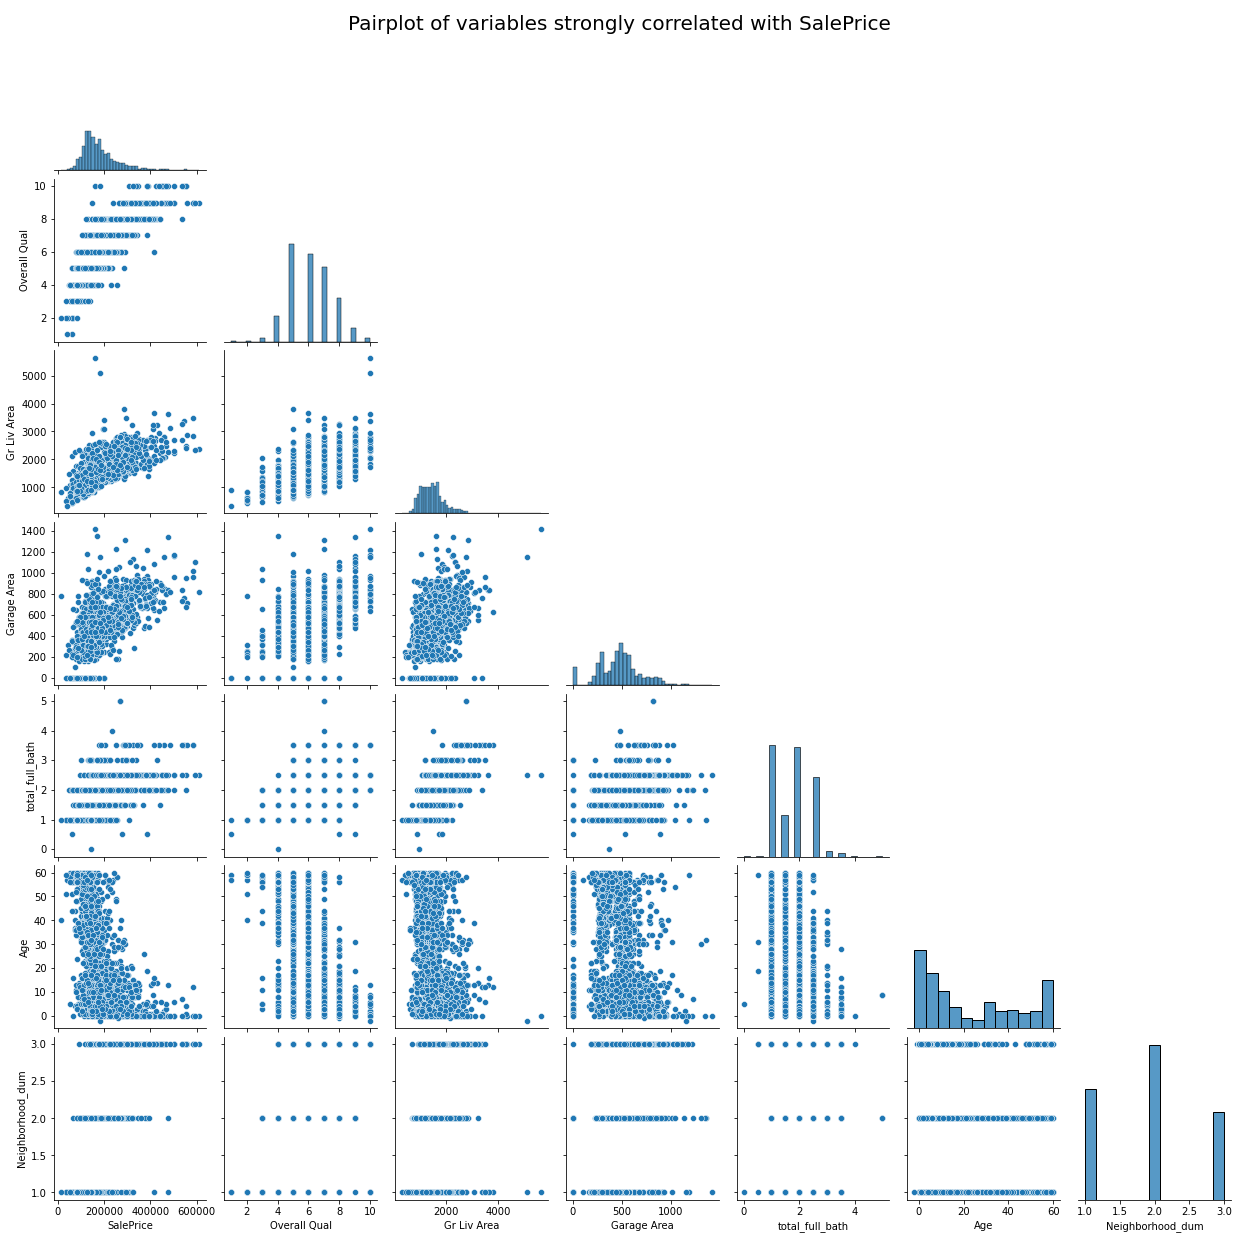

In [36]:
sns.pairplot(df, vars=['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 'total_full_bath', 'Age',
                       'Neighborhood_dum'], corner=True).fig.suptitle("Pairplot of variables strongly correlated with SalePrice", fontsize = 20);

SalePrice can be seen to be strongly positively correlated with Garage Area, Gr Liv Area and Overall Qual. However heteroskedasticity is appearing from a sale price of 400k onwards. This implies that the model will likely to be more accurate in the range of 0-400k. 

However there are 2 outliers in Gr Liv Area. (5000+ Gr Liv Area but only cost around 200k). I will be removing them.

Age can be seen to be negatively correlated with SalePrice which is realistic as the older the property, the conditions of the house starts to wear. 

In [45]:
# to remove the 2 outliers in Gr Liv Area that has more than 5000+ Gr Liv Area but only cost around 200k
df = df.loc[~(df['Gr Liv Area'] >= 5000)]

## <a name="preprocessing"></a>Preprocessing

In [46]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Age,total_fin_bsmt_SF,total_full_bath,total_porch_area,Neighborhood_dum
0,109,533352170,60,RL,0.0,13517,1,IR1,1,AllPub,...,0,3,2010,WD,130500,5,533.0,2.5,44,1
1,544,531379050,60,RL,43.0,11492,1,IR1,1,AllPub,...,0,4,2009,WD,220000,12,637.0,2.5,74,2
2,153,535304180,20,RL,68.0,7922,1,Reg,1,AllPub,...,0,1,2010,WD,109000,3,731.0,1.0,52,2
3,318,916386060,60,RL,73.0,9802,1,Reg,1,AllPub,...,0,4,2010,WD,174000,3,0.0,2.5,0,3
4,255,906425045,50,RL,82.0,14235,1,IR1,1,AllPub,...,0,3,2010,WD,138500,17,0.0,2.0,59,2


In [47]:
vars = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'total_fin_bsmt_SF', 'Low Qual Fin SF',
        'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Area', 'Age', 'Wood Deck SF', 'total_porch_area',
        'Pool Area', 'Street', 'Land Contour', 'Land Slope', 'Central Air', 'Kitchen Qual', 'Paved Drive', 'Exter Cond',
        'Neighborhood_dum']
X = df[vars]
y = df['SalePrice']

# Will not be including correlated variables such as the various basement features 
# Not to include TotRms AbvGrd as it is strongly positively correlated with Gr Liv Area
# Not to include Garage Yr as it is strongly positively correlated with Year Built
# Not to include Garage Cars as it is strongly positively correlated with Garage Area
# Removed Exter Qual as it is strongly correlated with Overall Qual and Kitchen Qual
# Removed total_full_bath as it is strongly correlated with Gr Liv Area

In [83]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice            1.000000
Overall Qual         0.800848
Gr Liv Area          0.717697
Total Bsmt SF        0.660588
Garage Area          0.653511
1st Flr SF           0.646129
Garage Cars          0.645532
Neighborhood_dum     0.645215
Exter Qual           0.633347
Kitchen Qual         0.585029
total_full_bath      0.568878
Year Built           0.564583
Year Remod/Add       0.542953
Full Bath            0.532377
Garage Yr Blt        0.531141
Mas Vnr Area         0.509366
TotRms AbvGrd        0.507188
Fireplaces           0.467439
BsmtFin SF 1         0.441039
total_fin_bsmt_SF    0.424742
Open Porch SF        0.352134
Wood Deck SF         0.322800
Lot Area             0.309617
Bsmt Full Bath       0.279113
Half Bath            0.278670
Paved Drive          0.268207
Central Air          0.253748
2nd Flr SF           0.246251
total_porch_area     0.231798
Lot Frontage         0.193334
Bsmt Unf SF          0.188474
Screen Porch         0.131825
Bedroom AbvGr        0.128013
3Ssn Porch

In [49]:
len(X.columns)

24

In [50]:
heatmap_corr = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'total_fin_bsmt_SF', 'Low Qual Fin SF',
        'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Area', 'Age', 'Wood Deck SF', 'total_porch_area',
        'Pool Area', 'Street', 'Land Contour', 'Land Slope', 'Central Air', 'Kitchen Qual', 'Paved Drive', 'Exter Cond',
        'Neighborhood_dum', 'Exter Qual', 'total_full_bath']

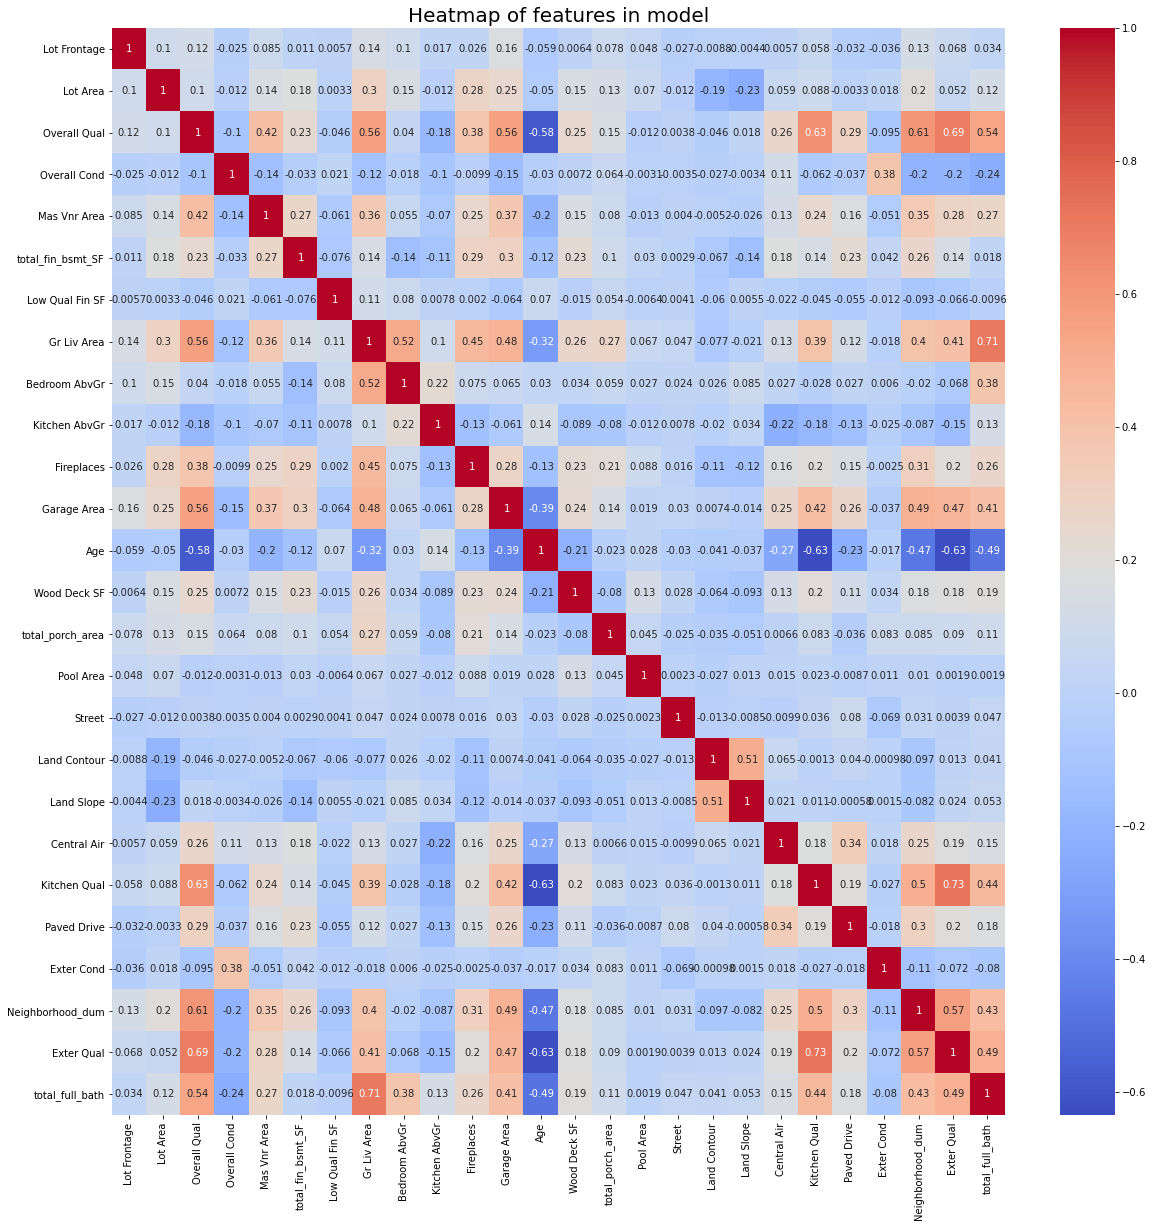

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df[heatmap_corr].corr(), annot=True, cmap='coolwarm');
plt.title("Heatmap of features in model", fontsize =20);

Kitchen Qual and Exter Qual has a strong positive correlation of 0.73. I will be removing Exter Qual as it is also strongly correlated with Overall Qual (0.69).

total_full_bath and Gr Liv Area have strong positive correlation of 0.71. I will be removing total_full_bath as Gr Liv Area is more positively correlated to SalePrice.

## <a name="train_test_split"></a>Train-test-split, Scaling and Scoring

In [52]:
# train-test split the data in 0.8 train and 0.2 test with random state of 46
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size = 0.8, random_state = 46)

In [53]:
X_num = ['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'total_fin_bsmt_SF',
           'Low Qual Fin SF', 'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Fireplaces', 'Garage Area', 'Age',
           'Wood Deck SF', 'total_porch_area', 'Pool Area']
X_cat = ['Street', 'Land Contour', 'Land Slope', 'Central Air', 'Kitchen Qual', 'Paved Drive', 'Exter Cond', 'Neighborhood_dum']


In [54]:
# scaling the numerical features of the model and joining back with the unscaled categorical features

ss_t = StandardScaler()
X_train_num_scaled = pd.DataFrame(ss_t.fit_transform(X_train[X_num]), columns = X_num)
X_scaled = X_train_num_scaled.join(X_train[X_cat].reset_index(drop=True), how='left')

In [55]:
# scaling the numerical features of the model and joining back with the unscaled categorical features

X_scaled_holdout = pd.DataFrame(ss_t.transform(X_holdout[X_num]), columns = X_num)
X_scaled_holdout = X_scaled_holdout.join(X_holdout[X_cat].reset_index(drop=True), how='left')

In [56]:
# RMSE of LinearRegression model with cross validation and k fold of 5
lr = LinearRegression()
lr.fit(X_train, y_train)

(-cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5).mean())**0.5

29420.914844765728

In [57]:
# Getting the optimal Alpha for Ridge model
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error', cv=5)
ridge_model.fit(X_scaled, y_train)
ridge_model.alpha_

34.09285069746813

In [58]:
# RMSE of Ridge model with cross validation and k fold of 5
(-cross_val_score(Ridge(alpha = ridge_model.alpha_), X_scaled, y_train, scoring = 'neg_mean_squared_error', cv=5).mean())**0.5

29359.602427559403

In [59]:
# Getting the optimal Alpha for Lasso model

lasso_model = LassoCV(n_alphas = 200, cv=5)
lasso_model.fit(X_scaled, y_train)
lasso_model.alpha_

124.62016703096154

In [60]:
# RMSE of Lasso model with cross validation and k fold of 5
(-cross_val_score(Lasso(alpha = lasso_model.alpha_), X_scaled, y_train, scoring = 'neg_mean_squared_error', cv=5).mean())**0.5

29370.874324022563

In [61]:
# Getting the optimal Alpha and l1_ratio for ElasticNet model

elasticnet_model = ElasticNetCV(l1_ratio=np.linspace(0.01, 1.0, 25), n_alphas=100, cv=5)
elasticnet_model.fit(X_scaled, y_train)
print(elasticnet_model.alpha_)
print(elasticnet_model.l1_ratio_)

125.05788926446132
1.0


In [62]:
# RMSE of ElasticNet model with cross validation and k fold of 5
(-cross_val_score(ElasticNet(alpha = elasticnet_model.alpha_, l1_ratio = elasticnet_model.l1_ratio_),
                  X_scaled,
                  y_train,
                  scoring = 'neg_mean_squared_error',
                  cv=5).mean())**0.5

29370.873569554948

The best model seems to be the **Ridge model** with a RMSE score of **29359.60** and R2 score of **0.8554**

## <a name="scoring_holdout"></a>Scoring with holdout set

In [63]:
# report the root mean squared error for the test set with LinearRegression.
lr = LinearRegression()
lr.fit(X_train, y_train)
(mean_squared_error(y_holdout, lr.predict(X_holdout)))**0.5

32021.953455534436

In [64]:
# report the root mean squared error for the test set with Ridge.
ridgebest = Ridge(alpha=ridge_model.alpha_)
ridgebest.fit(X_scaled, y_train)
(mean_squared_error(y_holdout, ridgebest.predict(X_scaled_holdout)))**0.5

31957.05994808788

In [65]:
# report the root mean squared error for the test set with Lasso.
lassobest = Lasso(alpha=lasso_model.alpha_)
lassobest.fit(X_scaled, y_train)
(mean_squared_error(y_holdout, lassobest.predict(X_scaled_holdout)))**0.5

31995.820704082398

In [66]:
# report the root mean squared error for the test set with ElasticNet.
elasticnetbest = ElasticNet(alpha = elasticnet_model.alpha_, l1_ratio = elasticnet_model.l1_ratio_)
elasticnetbest.fit(X_scaled, y_train)
(mean_squared_error(y_holdout, elasticnetbest.predict(X_scaled_holdout)))**0.5

31995.86171377792

The best model seems to be the **Ridge model** with RMSE score of **31957.06**

## <a name="visual_inference"></a>Inferential Visualization

|Model|Train (RMSE)|Holdout (RMSE)|
|---|---|---|
|Linear|29420.91|32021.95|
|Ridge|29359.60|31957.06|
|Lasso|29370.87|31995.82|
|Elastic Net|29370.87|31995.86|

We can clearly see that the Ridge model has the best RMSE for both the Train and Holdout set. (29359.60 and 31957.06 respectively).

One thing to note is that Elastic Net is using the optimal l1 ratio of 1 which is exactly the same as a Lasso model. This explains the similarity in the score.

Ridge model performs the best by shrinking the variable features and reducing multicollinearity.

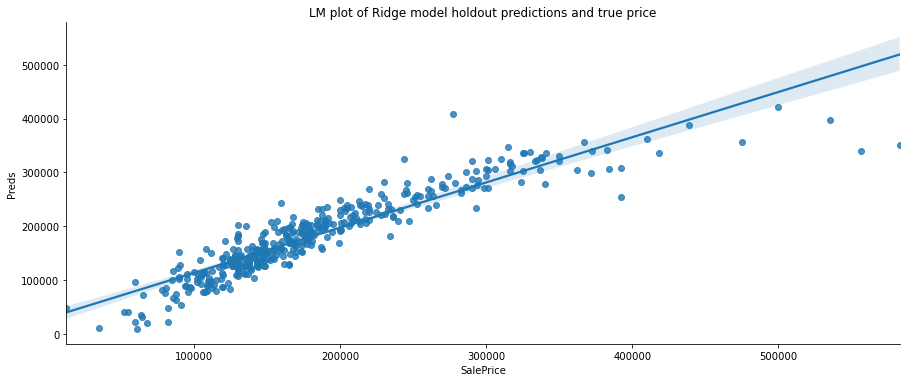

In [67]:
lmplot_df = pd.DataFrame(data = ridgebest.predict(X_scaled_holdout), columns = ['Preds'])
lmplot_df = lmplot_df.join(y_holdout.reset_index(drop=True))
sns.lmplot(x= 'SalePrice', y='Preds', data=lmplot_df, height = 5, aspect= 2.5);
plt.title('LM plot of Ridge model holdout predictions and true price');

Our model performed relatively well in the holdout set from the price range of 100k to 300k. From 300k onwards there appears to be hetroskadicity forming and the variance is getting larger. Hence our model will perform best for housing in the 100k to 300k Sale Price range. 

In [68]:
# Table of Change in SalePrice per 1 unit change in standardized variables

df_coef = pd.DataFrame(data = ridgebest.coef_, index = vars, 
             columns = ['Change in SalePrice (per 1 unit change)']).sort_values(by = 'Change in SalePrice (per 1 unit change)',
            ascending=False)
df_coef

,Change in SalePrice (per 1 unit change)
Gr Liv Area,25248.434569
Overall Qual,23822.360909
total_fin_bsmt_SF,14097.851248
Neighborhood_dum,9860.260568
Garage Area,7602.980346
Mas Vnr Area,7023.951744
Lot Area,6295.375186
Kitchen Qual,5807.288328
Lot Frontage,4124.577521
Overall Cond,2132.862161


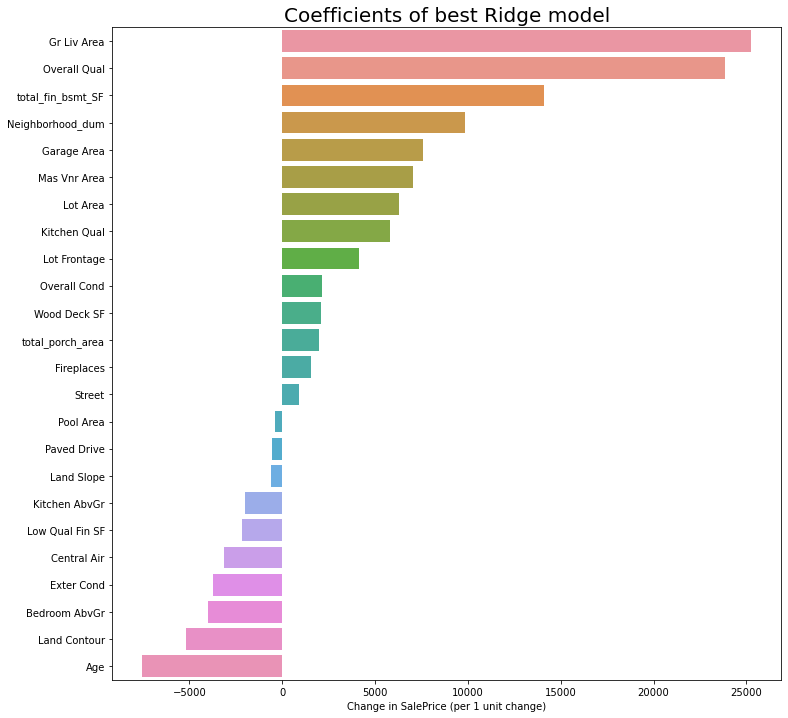

In [69]:
plt.figure(figsize = (12,12))
sns.barplot(y=df_coef.index, x = df_coef['Change in SalePrice (per 1 unit change)']);
plt.title("Coefficients of best Ridge model", fontsize =20);

## <a name="business_recommendations"></a>Business Recommendations
Which features appear to add the most value to a home?

- Ground Living Area adds the most value to a home price. As the coefficient from the best Ridge model is the highest. 

Which features hurt the value of a home the most?

- Age hurts the value of a home the most as the coefficient is the lowest from the best Ridge model.

What are things that homeowners could improve in their homes to increase the value?

- Homeowners should increase the Ground Living Area / overall material and finish of their homes. However this is unlikely to be helpful as the construction/renovation cost could outweight the increase in value. 

- Some ways to increase the value of the home without construction/renovation related cost is to improve the Neighborhood conditions by requesting the Mayor of the Neighborhood to build more infrastructures and ameneties. 

What neighborhoods seem like they might be a good investment?

- From the Neighborhood boxplot that we have seen above, the Neighborhoods that might be a good investment are Stone Brook and Northridge Heights.

- They have the highest median sale price (300k and above) and also a concentrated range from 200k to 400k. Investing in these Neighborhoods have a higher probability than the rest of the Neighborhood to be sold at a price above 200k.   

Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what date would you need from another city to make a comparable model?

- No as this model is highly correlated to the Neighborhood data. One way is to remove features such as Neighborhood dummies (Neighborhood_dum) which only affects housing prices in these Neighborhoods (Ames). 

- We will need year sold dates from 2006-2010 from another city.

Some anomalies to note:

- The larger the Pool area the lower the SalePrice.

- The more kitchen above ground the lower the SalePrice.

- The more bedrooms above ground the lower the SalePrice.

## <a name="clean_test_predict"></a>Clean test.csv and predict values

In [70]:
def clean_test(df):
    """ To clean the test.csv file with the codes used for the train set"""
    df.drop(columns = ['Alley', 'Pool QC', 'Fence', 'Misc Feature'], inplace=True)
    df.drop(columns = 'Fireplace Qu', inplace=True)
    df['Lot Frontage'].fillna(0, inplace=True)
    df['Garage Area'].fillna(0, inplace=True)
    df['Bsmt Unf SF'].fillna(0, inplace=True)
    df['Total Bsmt SF'].fillna(0, inplace=True)
    df['Mas Vnr Area'].fillna(0, inplace=True)
    df['Street'] = df['Street'].map(lambda x: 1 if x == 'Pave' else 0)
    df['Land Contour'] = df['Land Contour'].map(lambda x: 1 if x == 'Lvl' else 0)
    df['Central Air'] = df['Central Air'].map(lambda x: 1 if x == "Y" else 0)
    df['Paved Drive'] = df['Paved Drive'].map(lambda x: 1 if x == "Y" else 0)
    df['Land Slope'] = df['Land Slope'].map(lambda x: 1 if x == "Gtl" else 0)
    df['Exter Qual'] = df['Exter Qual'].map(lambda x: 1 if x == "Ex" or x == "Gd" else 0)
    df['Exter Cond'] = df['Exter Cond'].map(lambda x: 1 if x == "Ex" or x == 'Gd' else 0)
    df['Kitchen Qual'] = df['Kitchen Qual'].map(lambda x: 1 if x == "Ex" or x == 'Gd' else 0)
    df['Age'] = df['Yr Sold'] - df['Year Remod/Add']
    df['total_fin_bsmt_SF'] = df['Total Bsmt SF'] - df['Bsmt Unf SF']
    df['total_full_bath'] = df['Full Bath'] + (df['Half Bath'] * 0.5)
    df['total_porch_area'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']
    df['Neighborhood_dum'] = df['Neighborhood'].map(dum_neigh)
    return df

In [71]:
df_test = clean_test(df_test) # using the function to perform EDA on test set

In [72]:
df_test.head() 

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Age,total_fin_bsmt_SF,total_full_bath,total_porch_area,Neighborhood_dum
0,2658,902301120,190,RM,69.0,9142,1,Reg,1,AllPub,...,0,0,4,2006,WD,56,0,2.0,172,1
1,2718,905108090,90,RL,0.0,9662,1,IR1,1,AllPub,...,0,0,8,2006,WD,29,0,2.0,0,1
2,2414,528218130,60,RL,58.0,17104,1,IR1,1,AllPub,...,0,0,9,2006,New,0,554,2.5,24,2
3,1989,902207150,30,RM,60.0,8520,1,Reg,1,AllPub,...,0,0,7,2007,WD,1,0,1.0,184,1
4,625,535105100,20,RL,0.0,9500,1,IR1,1,AllPub,...,0,0,7,2009,WD,46,609,1.5,261,2


In [73]:
df_test.shape # checking shape of dataframe

(879, 80)

In [74]:
vars_test = vars
X_test = df_test[vars_test]

In [75]:
# scaling the numerical features of the model and joining back with the unscaled categorical features

X_scaled_test = pd.DataFrame(ss_t.transform(X_test[X_num]), columns = X_num)
X_scaled_test = X_scaled_test.join(X_test[X_cat].reset_index(drop=True), how='left')

In [76]:
ridgebest.predict(X_scaled_test) # predict SalePrice to be added into DataFrame

array([151371.49472985, 121213.92228476, 211512.66363137, 115362.17304297,
       171117.91097377,  73709.26176589,  93048.81672745, 127747.18793464,
       203822.73931803, 180910.58943175, 157804.66548594, 124656.99743496,
       146671.9364189 , 258268.75730574, 181707.60176066, 130269.7783177 ,
       158585.28062314, 101198.09273231, 221436.38157895, 222993.109056  ,
       135893.69217399, 111335.77819971, 206558.49772542, 191702.86369776,
       180326.80452481, 106112.30423083, 122712.93914878, 145466.6396794 ,
       160095.01416241,  23630.26752689,  93590.64319314,  74239.30535975,
       264858.5319511 , 172246.92897445, 205216.72441732, 189146.24803978,
       111938.30423653,  70477.77620003, 122845.14705445, 195063.99944084,
       168190.89617729, 194082.65173762, 157789.78059537, 184615.20083188,
       239677.56199913,  82136.84265942, 229517.10894024, 118923.8710608 ,
       130467.23164764, 115630.27577573, 106155.73914844, 240179.3961855 ,
       233907.21007116, 1

In [77]:
ridgebest.predict(X_scaled_test).shape # Ensuring the rows equal = 879

(879,)

In [78]:
df_submit = pd.DataFrame(data = {'Id': df_test['Id'], 'SalePrice': ridgebest.predict(X_scaled_test)}).sort_values(by = ['Id'])

In [79]:
df_submit # Checking the DataFrame rows and columns

,Id,SalePrice
704,2,137822.501158
706,4,246364.939581
120,6,200714.490374
312,7,223414.840219
401,17,245866.291377
...,...,...
537,2919,52463.676296
179,2921,70433.362336
829,2922,195417.519272
669,2925,198812.652812


In [80]:
df_submit.to_csv('datasets/kaggle_sub.csv', index=False) # Save DataFrame file as CSV 

In [81]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)